In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
# increase the figure size
sns.set(rc={'figure.figsize': (15, 5)})
sns.set_style("whitegrid")

In [2]:
sensor_df = pd.read_csv("https://raw.githubusercontent.com/AllisonOge/predictive_modeling/main/data/sensor_ml.csv", index_col="id")
sensor_df

,chan_1,chan_2,chan_3,chan_4,created_at
id,,,,,
1,1,0,0,0,2022-11-15 16:14:18.829480
2,1,0,0,0,2022-11-15 16:14:18.914676
3,1,0,0,0,2022-11-15 16:14:18.983745
4,1,0,0,0,2022-11-15 16:14:19.059611
5,1,0,0,0,2022-11-15 16:14:19.134008
...,...,...,...,...,...
23566,1,1,1,1,2022-11-15 16:44:18.563776
23567,1,1,1,1,2022-11-15 16:44:18.693114
23568,1,1,1,1,2022-11-15 16:44:18.755782


In [5]:
sensor_df.groupby("created_at")["chan_1"].value_counts()

created_at                  chan_1
2022-11-15 16:14:18.829480  1         1
2022-11-15 16:14:18.914676  1         1
2022-11-15 16:14:18.983745  1         1
2022-11-15 16:14:19.059611  1         1
2022-11-15 16:14:19.134008  1         1
                                     ..
2022-11-15 16:44:18.563776  1         1
2022-11-15 16:44:18.693114  1         1
2022-11-15 16:44:18.755782  1         1
2022-11-15 16:44:18.819509  1         1
2022-11-15 16:44:18.885257  1         1
Name: chan_1, Length: 23570, dtype: int64

In [6]:
sensor_df.groupby("created_at")["chan_2"].value_counts()

created_at                  chan_2
2022-11-15 16:14:18.829480  0         1
2022-11-15 16:14:18.914676  0         1
2022-11-15 16:14:18.983745  0         1
2022-11-15 16:14:19.059611  0         1
2022-11-15 16:14:19.134008  0         1
                                     ..
2022-11-15 16:44:18.563776  1         1
2022-11-15 16:44:18.693114  1         1
2022-11-15 16:44:18.755782  1         1
2022-11-15 16:44:18.819509  1         1
2022-11-15 16:44:18.885257  1         1
Name: chan_2, Length: 23570, dtype: int64

In [7]:
sensor_df.groupby("created_at")["chan_3"].value_counts()

created_at                  chan_3
2022-11-15 16:14:18.829480  0         1
2022-11-15 16:14:18.914676  0         1
2022-11-15 16:14:18.983745  0         1
2022-11-15 16:14:19.059611  0         1
2022-11-15 16:14:19.134008  0         1
                                     ..
2022-11-15 16:44:18.563776  1         1
2022-11-15 16:44:18.693114  1         1
2022-11-15 16:44:18.755782  1         1
2022-11-15 16:44:18.819509  1         1
2022-11-15 16:44:18.885257  1         1
Name: chan_3, Length: 23570, dtype: int64

In [8]:
sensor_df.groupby("created_at")["chan_4"].value_counts()

created_at                  chan_4
2022-11-15 16:14:18.829480  0         1
2022-11-15 16:14:18.914676  0         1
2022-11-15 16:14:18.983745  0         1
2022-11-15 16:14:19.059611  0         1
2022-11-15 16:14:19.134008  0         1
                                     ..
2022-11-15 16:44:18.563776  1         1
2022-11-15 16:44:18.693114  1         1
2022-11-15 16:44:18.755782  1         1
2022-11-15 16:44:18.819509  1         1
2022-11-15 16:44:18.885257  1         1
Name: chan_4, Length: 23570, dtype: int64

In [9]:
sensor_copy_df = sensor_df
sensor_copy_df = sensor_copy_df.drop_duplicates(subset="created_at")
sensor_copy_df = sensor_copy_df.set_index("created_at")

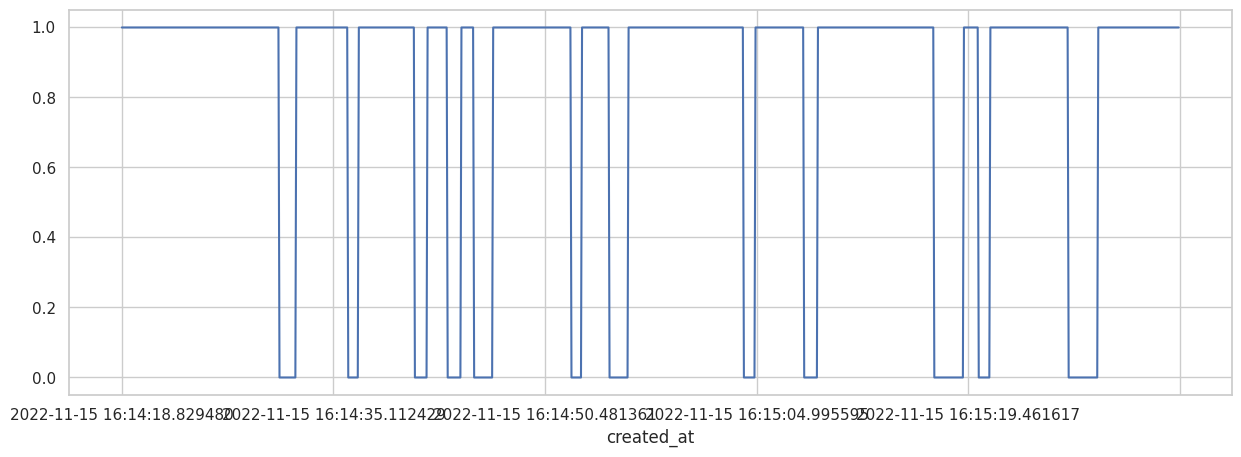

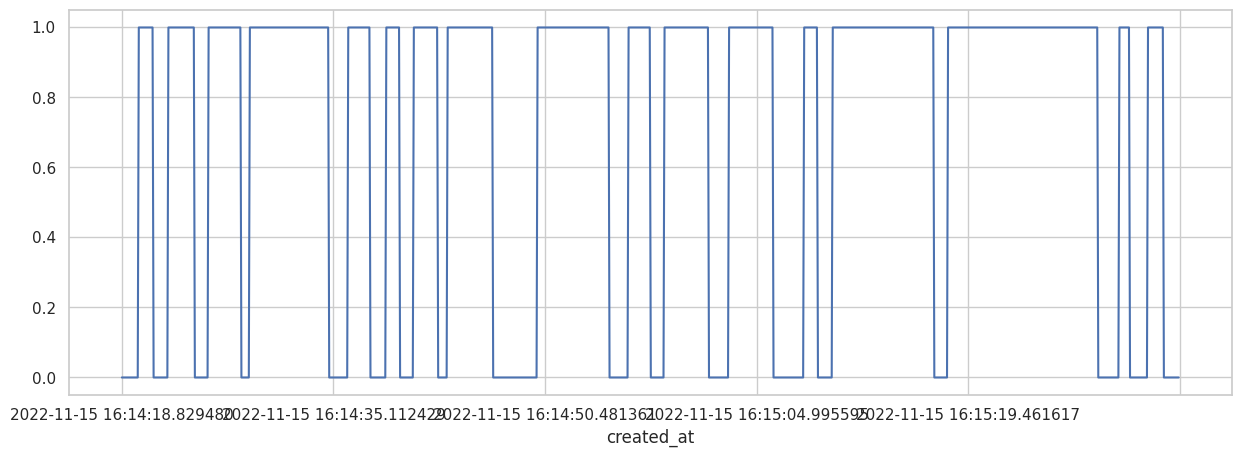

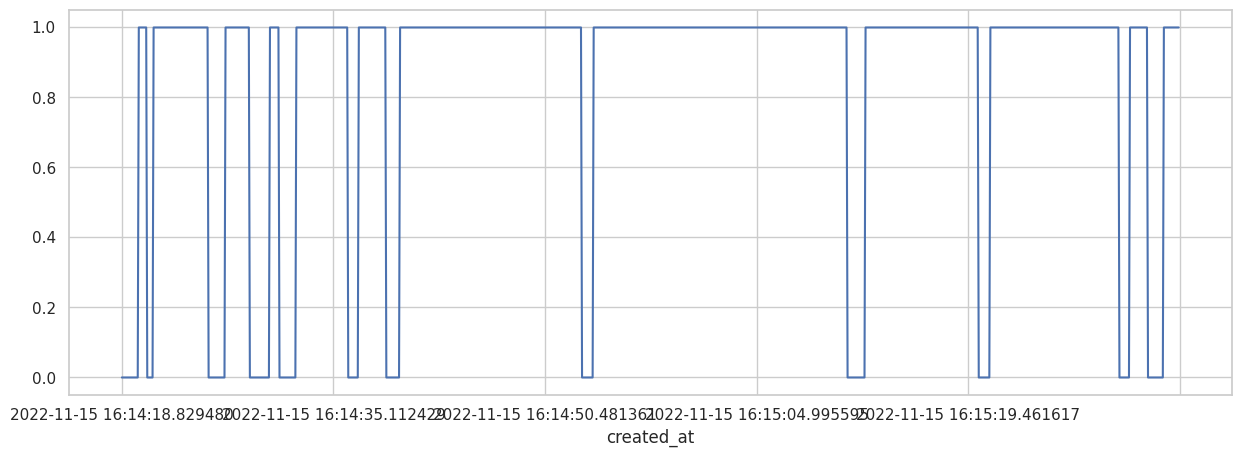

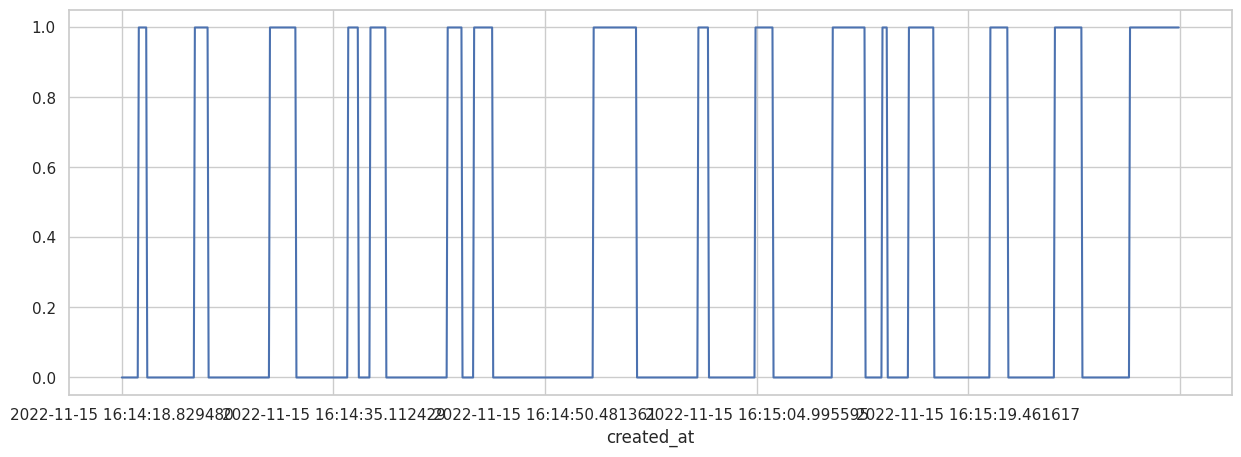

In [10]:
for col in sensor_copy_df.columns:
  sensor_copy_df[col][:1000].plot()
  plt.show()

## Hypothesis 🤔: Can my model predict the idle time for a channel?

## Data preparation 🍳

In [11]:
def start_and_idle_time(bit_sequence):
    bit_sequence = np.asarray(bit_sequence, dtype=np.int32)
    start_time = 0
    idle_time = 0
    idle_times = []
    for i, bit in enumerate(bit_sequence):
        if i > 0:
            if bit == 0 and bit_sequence[i-1] == 1:
                # 1,0
                start_time = i
                idle_time += 1
            elif bit == 0 and bit_sequence[i-1] == 0:
                # 0,0
                idle_time += 1
            elif bit == 1 and bit_sequence[i-1] == 0:
                # 0,1
                idle_times.append((start_time, idle_time))
                idle_time = 0
        else:
            if bit == 0:
                start_time = i
                idle_time += 1

        if i == len(bit_sequence)-1 and idle_time > 0:
            idle_times.append((start_time, idle_time))
        
        if len(idle_times) > 1:
          break

    return np.array(idle_times)

In [12]:
def get_idletimes_df(df):
  idle_times = []
  for i in range(df.shape[0]):
    idle_times.append([j[0][1] if len(j) > 0 and i+j[0][0] <= i else 0 
                       for j in  list(map(start_and_idle_time, df.to_numpy()[i:].transpose()))])
    
  return pd.DataFrame(data=idle_times, index=df.index, columns=df.columns)

In [13]:
idle_times_df = get_idletimes_df(sensor_copy_df)
idle_times_df

,chan_1,chan_2,chan_3,chan_4
created_at,,,,
2022-11-15 16:14:18.829480,0,16,16,16
2022-11-15 16:14:18.914676,0,15,15,15
2022-11-15 16:14:18.983745,0,14,14,14
2022-11-15 16:14:19.059611,0,13,13,13
2022-11-15 16:14:19.134008,0,12,12,12
...,...,...,...,...
2022-11-15 16:44:18.563776,0,0,0,0
2022-11-15 16:44:18.693114,0,0,0,0
2022-11-15 16:44:18.755782,0,0,0,0


In [14]:
# save the idletime
idle_times_df.to_csv("./data/idletimes.csv")

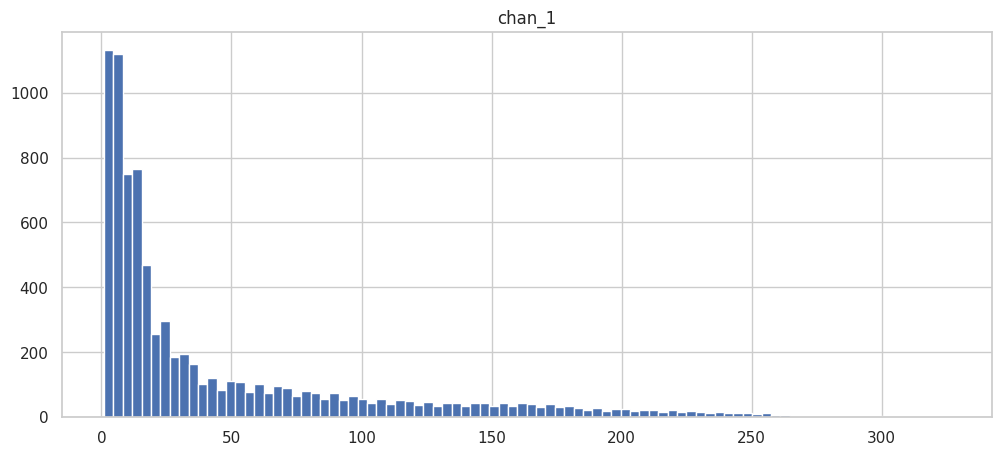

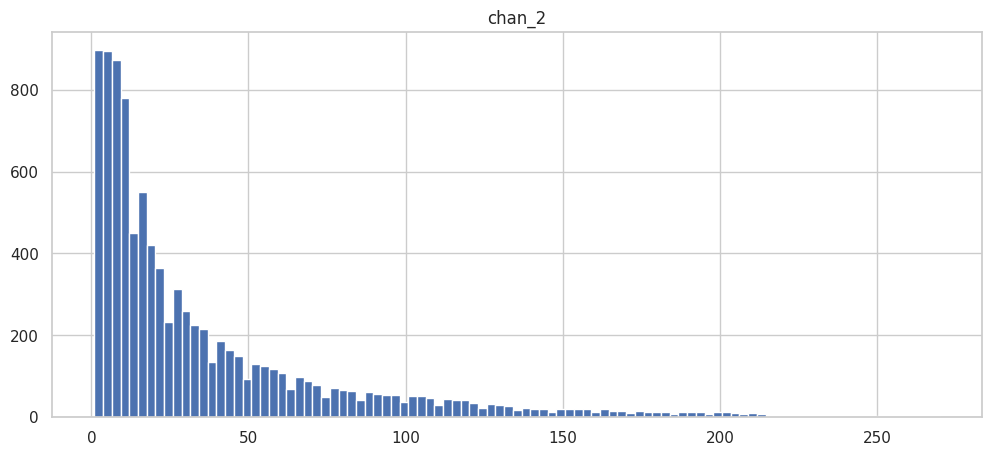

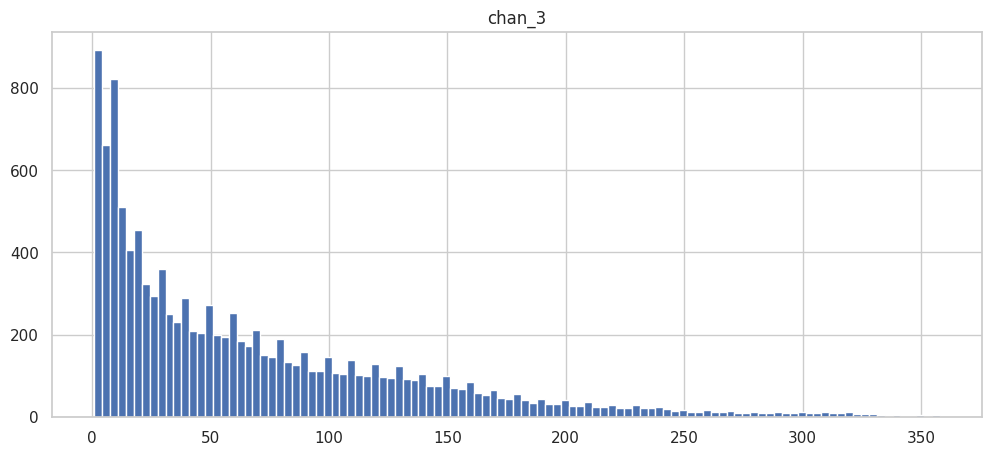

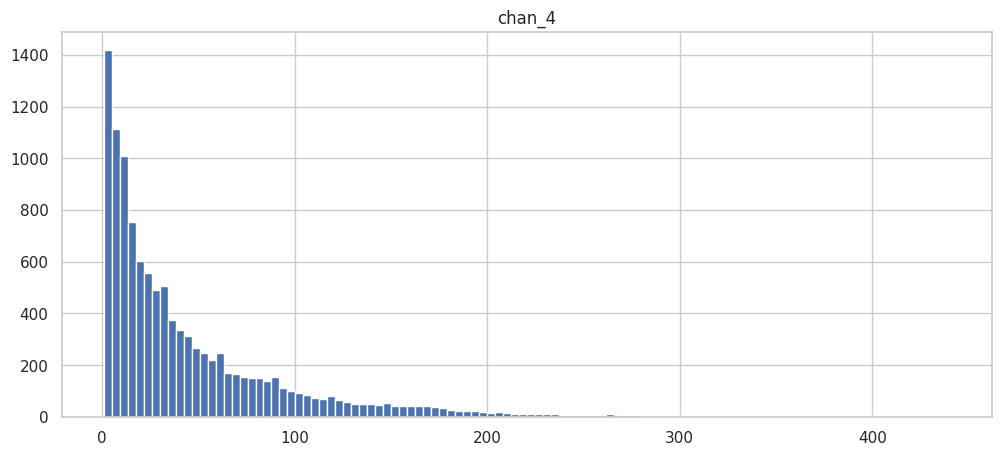

In [15]:
for col in idle_times_df.columns:
  plt.figure(figsize=(12, 5))
  data = idle_times_df[idle_times_df[col] > 0][col]
  plt.hist(data, bins=int(np.sqrt(len(data))))
  plt.title(col)
  plt.show()